<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Función para evaluar cada modelo en entrenamiento (80%) y validación (20%)

In [0]:
def fit_eval(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []

    m = len(X_train)
    model.fit(X_train[:m], y_train[:m])
    
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    cv_scores = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)

    err_train = np.sqrt(train_errors).mean()
    err_test = np.sqrt(test_errors).mean()
    err_cv =  cv_scores.mean()
    return  err_train, err_test, err_cv


Cargar datos de precios de casas en Boston

In [0]:
url_data = 'https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/housing.data'
data = pd.read_csv(url_data,header=None, delimiter=r"\s+")
df = data.to_numpy()

X = df[:,0:13]
y = df[:,13]


err_train = []
err_test = []
err_cv = []

et = []
ev = []
cv = []

Se evalua el modelo con diferentes grados de expansión polinomial

In [4]:
grado = 5

#hacemos el experimento para diferentes grados de expansion polinomica
for i in range(1, grado+1):
    #realizamos el experimento 10 veces
    for n in range(10):
      polynomial_regression = Pipeline([
              ("poly_features", PolynomialFeatures(degree=i, interaction_only=False, include_bias=False)),
              ("lin_reg", LinearRegression()),
              ])

      et_ex, ev_ex, cv_ex = fit_eval(polynomial_regression, X, y)
      et.append(et_ex)
      ev.append(ev_ex)
      cv.append(cv_ex)
      
      
    err_train.append(sum(et) / len(et))
    err_test.append(sum(ev) / len(ev))
    err_cv.append(sum(cv) / len(cv))
    print("Grado del Polinomio {} Error de Entrenamiento {}".format(i, sum(et) / len(et)))
    print("Grado del Polinomio {} Error de Validación {}".format(i, sum(ev) / len(ev)))
    print("Grado del Polinomio {} Error de Validación Cruzada {}".format(i, sum(cv) / len(cv)))

Grado del Polinomio 1 Error de Entrenamiento 4.628805002533429
Grado del Polinomio 1 Error de Validación 4.951471351150628
Grado del Polinomio 1 Error de Validación Cruzada -5.8286589462158185
Grado del Polinomio 2 Error de Entrenamiento 3.508857297783738
Grado del Polinomio 2 Error de Validación 4.389752256840854
Grado del Polinomio 2 Error de Validación Cruzada -8.54539442520706
Grado del Polinomio 3 Error de Entrenamiento 2.3392406995896198
Grado del Polinomio 3 Error de Validación 165.27151351447816
Grado del Polinomio 3 Error de Validación Cruzada -10499.22775518637
Grado del Polinomio 4 Error de Entrenamiento 1.7544305247686538
Grado del Polinomio 4 Error de Validación 205.88414826510024
Grado del Polinomio 4 Error de Validación Cruzada -8608.535882703878
Grado del Polinomio 5 Error de Entrenamiento 1.4035444199058873
Grado del Polinomio 5 Error de Validación 202.65760389136912
Grado del Polinomio 5 Error de Validación Cruzada -7548.667440794122


Se grafican los niveles de error en entrenamiento y validacion para diferentes grados de expansión polinomial

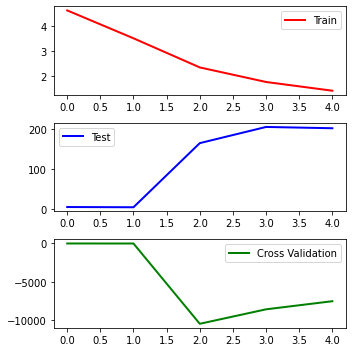

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 5))
axes[0].plot(err_train, "r", linewidth=2, label="Train")
axes[0].legend(loc="best")

axes[1].plot(err_test, "b", linewidth=2, label="Test")
axes[1].legend(loc="best")

axes[2].plot(err_cv, "g", linewidth=2, label="Cross Validation")
axes[2].legend(loc="best")


fig.tight_layout()